In [2]:
import numpy as np

In [121]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [94]:
X, y = make_blobs(n_samples=15000, n_features=15, centers=2, random_state=0)
y = y.reshape((X.shape[0], 1))

In [124]:
class PERCETRON:
    
    def __init__(self, input_dim):
        
        self.W = np.random.randn(input_dim, 1)
        self.b = np.random.randn(1)
        
    def __activation(self, X):
        Z = np.dot(X, self.W) + self.b
        A = 1/(1+np.exp(-Z))
        return A
    
    def __log_loss(self, A, y):
        epsilon = 1e-15
        return -1/len(y)*np.sum(y * np.log(A+epsilon) + (1-y)*np.log(1-A+epsilon))
    
    def __gradients(self, X, y, A):
        dw = 1 / len(y) * np.dot(X.T, A-y)
        db = 1 / len(y)*np.sum(A-y)
        return (dw, db)
    
    def __update(self, dw, db, lear_rate):
        
        self.W = self.W -lear_rate*dw
        self.b = self.b - lear_rate*db
        return (self.W, self.b)
    
    def predict(self, X):
        A = self.__activation(X)
        return A>=0.5
    
    def fit(self, X, y, lear_rate=0.1, n_iters=100):
        train_loss = []
        for _ in tqdm(range(n_iters)):
            y_pred = self.predict(X)
            A = self.__activation(X)
            train_loss.append(self.__log_loss(A, y))
            dw, db = self.__gradients(X, y, A)
            self.W, self.b = self.__update(dw, db, lear_rate)
            
        plt.plot(train_loss, label="train loss")
        plt.xlabel("Nomber of iterations")
        plt.ylabel("Log loss")
            
        

In [125]:
clf = PERCETRON(X.shape[1])

In [126]:
print("b", clf.b)
print("W", clf.W)

b [1.53854393]
W [[ 0.58279505]
 [-0.98473969]
 [-0.33738065]
 [ 0.91752119]
 [ 0.60938247]
 [ 0.3467046 ]
 [ 1.49308498]
 [ 1.18946048]
 [ 1.43979527]
 [-1.14297561]
 [-2.82822778]
 [ 0.69973528]
 [ 1.43377844]
 [ 0.3805469 ]
 [ 1.1946789 ]]


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 246.15it/s]


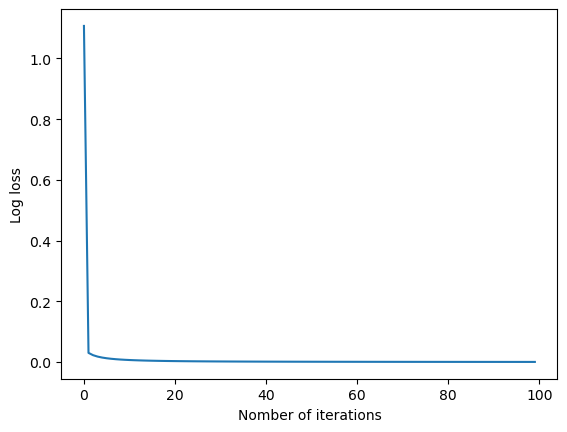

In [127]:
clf.fit(X, y)

In [99]:
print("b", clf.b)
print("W", clf.W)

b [1.24288791]
W [[-1.33129847]
 [-0.43169532]
 [ 1.34831913]
 [-1.10735697]
 [-0.00714344]
 [-1.18359508]
 [ 0.56343198]
 [-0.06731982]
 [ 0.36816577]
 [-0.30797466]
 [-0.82986032]
 [-0.22099093]
 [-0.18282927]
 [ 0.2102735 ]
 [ 0.8408288 ]]


In [100]:
print("accuracy: ", accuracy_score(y, clf.predict(X)))

accuracy:  0.9998666666666667


# TP

In [101]:
from utilities import *

In [102]:
X_train, y_train, X_test, y_test = load_data()

In [103]:
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (1000, 64, 64)
X_test shape : (200, 64, 64)
y_train shape : (1000, 1)
y_test shape : (200, 1)


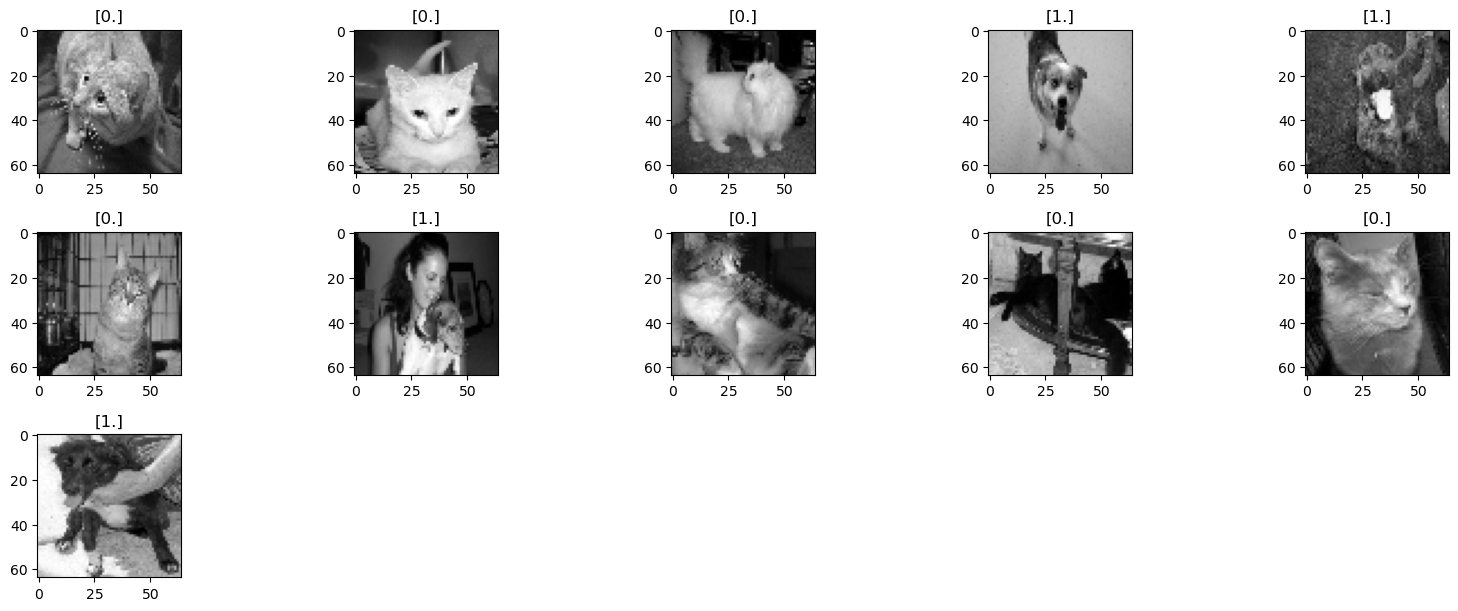

In [105]:
plt.figure(figsize=(16, 8))
for i in range(1, 12):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()

In [106]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [107]:
print("X_train_reshape shape :", X_train_reshape.shape)
print("X_test_reshape shape :", X_test_reshape.shape)

X_train_reshape shape : (1000, 4096)
X_test_reshape shape : (200, 4096)


In [108]:
def normalisation(X):
    X_norm = (X-X.min())/(X.max() - X.min())
    return X_norm

In [109]:
X_train_norm = normalisation(X_train_reshape)
X_test_norm = normalisation(X_test_reshape)

In [130]:
clf_1 = PERCETRON(X_train_norm.shape[1])

In [131]:
(clf_1.W).shape

(4096, 1)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:00<00:00, 83.06it/s]


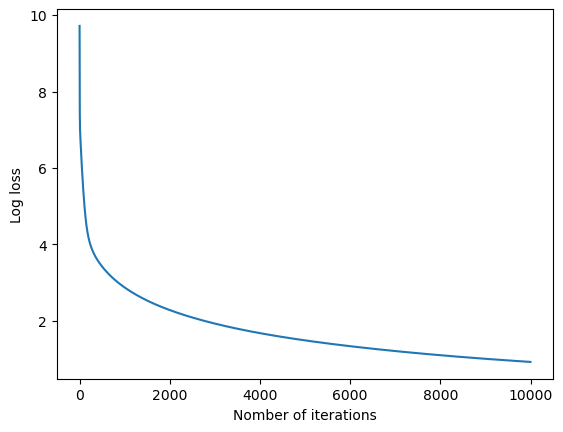

In [132]:
clf_1.fit(X_train_norm, y_train, 0.01, 10000)

In [129]:
print("test accuracy: ", accuracy_score(y_test, clf_1.predict(X_test_norm)))

test accuracy:  0.55
